In [1]:
import os
import sys
sys.path.append('../')

import numpy as np
from matplotlib import pyplot as plt

from models.graph import Graph, load_graph

In [2]:
plt.rc('font', family='dejavuserif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

In [3]:
def plot_rz(X, Ri, Ro, y, save_fig=False, filename="rz.png"):
    X = np.array(X)
    feats_o = np.matmul(Ro.transpose(), X)
    feats_i = np.matmul(Ri.transpose(), X)

    fig = plt.figure(dpi=150)
    for i in range(len(X)):        
        plt.scatter(X[i][2], X[i][0], c='silver', linewidths=0, marker='s', s=8)

    track_segs_o = feats_o[y>0.5]
    track_segs_i = feats_i[y>0.5]
    for i in range(len(track_segs_o)):
        plt.plot((track_segs_o[i][2], track_segs_i[i][2]),
                 (track_segs_o[i][0], track_segs_i[i][0]),
                 'bo-', lw=0.1, ms=0.1, alpha=0.8)
    
    false_edges_o = feats_o[y<0.5]
    false_edges_i = feats_i[y<0.5]
    for i in range(len(false_edges_o)):
        plt.plot((false_edges_o[i][2], false_edges_i[i][2]),
                 (false_edges_o[i][0], false_edges_i[i][0]),
                 'ko-', lw=0.1, ms=0.1, alpha=0.2)

        
    plt.ylabel("R [m]")
    plt.xlabel("z [m]")
    if (save_fig): plt.savefig(filename, dpi=1200)
    plt.show()

In [4]:
pt_cut = '2'
construction = 'heptrkx_plus'
graph_dir = '../../hitgraphs/{}_{}'.format(construction, pt_cut)
graph_paths = [os.path.join(graph_dir, i) for i in os.listdir(graph_dir)]
graph = load_graph(graph_paths[22])

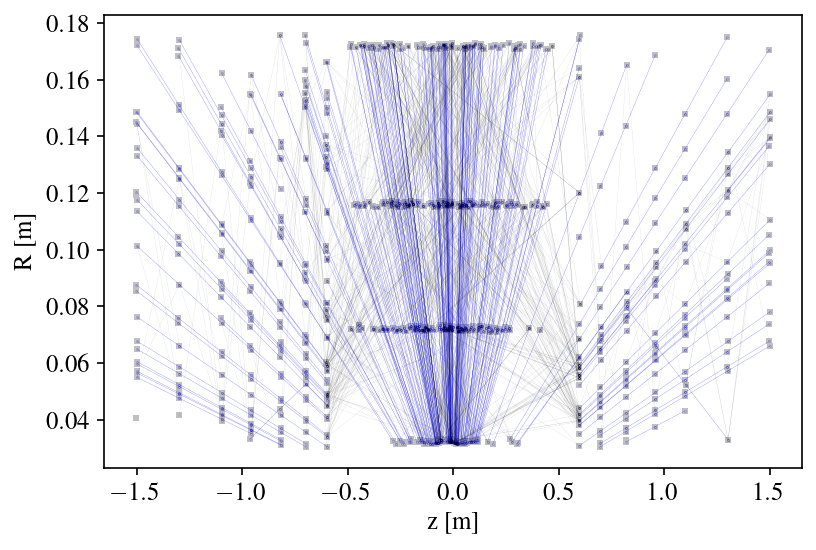

In [5]:
plot_rz(graph.X, graph.Ri, graph.Ro, graph.y)

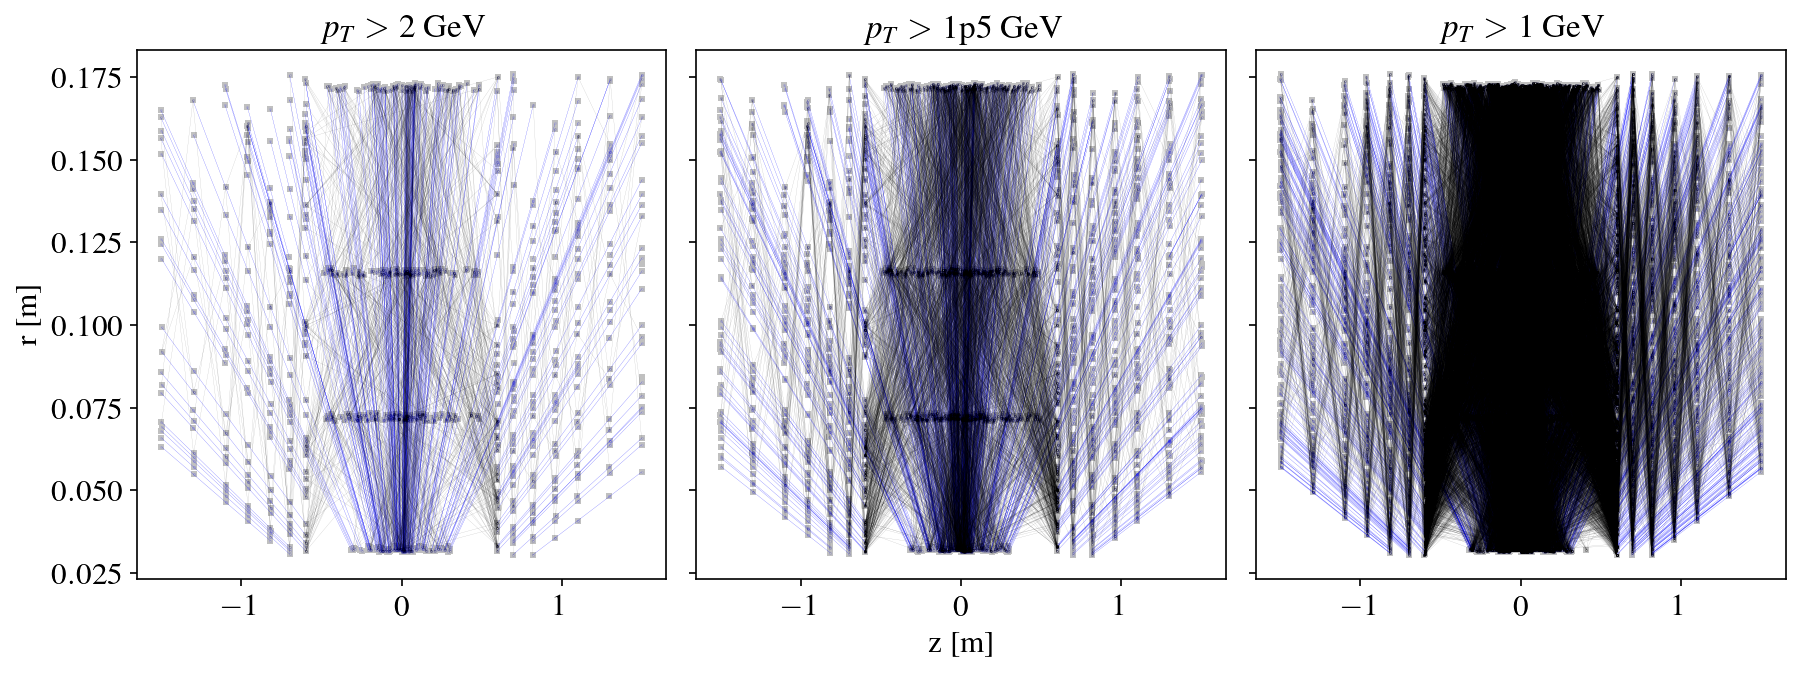

In [7]:
plt.rc('font', family='dejavuserif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)

pt_cuts = ['2', '1p5', '1']
evtid = '1027'
construction = 'heptrkx_plus'

fig, axs = plt.subplots(nrows=1, ncols=len(pt_cuts), figsize=(12,12), sharey=True, dpi=150)
for i, pt_cut in enumerate(pt_cuts):
    graph_dir = '../../hitgraphs/{}_{}'.format(construction, pt_cut)
    evt_path = 'event00000'+evtid+'_g000.npz'
    graph = load_graph(os.path.join(graph_dir, evt_path))
    
    X, Ri, Ro, y = graph.X, graph.Ri, graph.Ro, graph.y
    feats_o, feats_i = Ro.transpose() @ X, Ri.transpose() @ X

    track_segs_o = feats_o[y>0.5]
    track_segs_i = feats_i[y>0.5]
    axs[i].plot((track_segs_o[:,2], track_segs_i[:,2]),
                 (track_segs_o[:,0], track_segs_i[:,0]),
                 'bo-', lw=0.1, ms=0.05, alpha=0.8)
    
    false_edges_o = feats_o[y<0.5]
    false_edges_i = feats_i[y<0.5]
    axs[i].plot((false_edges_o[:,2], false_edges_i[:,2]),
                 (false_edges_o[:,0], false_edges_i[:,0]),
                 'ko-', lw=0.1, ms=0.05, alpha=0.3)
    
    axs[i].scatter(X[:,2], X[:,0], c='silver', lw=0, marker='s', s=8)
    axs[i].set_box_aspect(1)
    axs[i].set_title("$p_T >$ {} GeV".format(pt_cut), fontsize=16)

axs[0].set_ylabel("r [m]")
axs[1].set_xlabel("z [m]")
plt.tight_layout()
plt.savefig('graph_construction_staggered_pt.png', dpi=800)
plt.show()